# Test a Perceptual Phenomenon

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel, norm

In [3]:
# Read in data
df = pd.read_csv('stroopdata.csv')

## What is our independent variable? What is our dependent variable?

**Independent variable**: the text color condition (congruent or incongruent).

**Dependent variable**: the reaction time (the time it takes to name the ink color).

## What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**Null hypothesis**: the reaction time for the congruent and incongruent conditions is the same.

$$\mu(\text{congruent}) = \mu(\text{incongruent})$$

**Alternative hypothesis**: the reaction time for the two conditons are different.

$$\mu(\text{congruent})  \neq \mu(\text{incongruent})$$

It's hard to imagine the reverse being true; that the reaction time would be *faster* for the incongruent condition. On the other hand, it is not a priori completely implausible that the  reaction times would be the same.

We will use the **paired t-test** to test whether the mean reaction times under the two conditions are equal or not. The t-test allows finding out whether the means of two sets of data are different.

We believe the use of a paired t-test is appropriate since the following conditions are met (see [1], Analysis checklist: Paired t test):

#### 1. Are the differences distributed according to a Gaussian distribution?
As will be shown graphically in a later section, the differences are distributed close to normally.

#### 2. Was the pairing effective?
The pairing was part of the design of the experiment; each pair represents trials from a single participant. This is an effective pairing method.

#### 3. Are the pairs independent?
Each pair corresponds to trials by a different participant; they are independent.

#### 4. Are you comparing exactly two groups?
Yes.

#### 5. If you chose a one-tail P value, did you predict correctly?
We did not choose a one-tail P value (although we could have).

#### 6. Do you care about differences or ratios?
We expect the control values and differences to be of the same order of magnitude, so differences should be fine.


## Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [4]:
IQR_congruent = df['Congruent'].quantile(0.75) - df['Congruent'].quantile(0.25)
IQR_incongruent = df['Incongruent'].quantile(0.75) - df['Incongruent'].quantile(0.25)
print(df['Congruent'].median(), df['Incongruent'].median(), IQR_congruent, IQR_incongruent)

(14.3565, 21.0175, 4.3054999999999986, 5.3347499999999997)


- Median reaction time, congruent condition: 14.357
- Median reaction time, incongruent condition: 21.017
- Interquartile range, congruent condition: 4.305
- Interquartile range, incongruent condition: 5.335.

## Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots

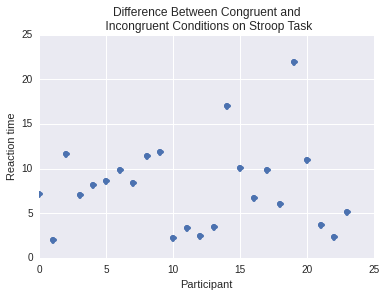

In [5]:
%matplotlib inline
plt.plot(df['Incongruent']-df['Congruent'], 'o')
plt.title('Difference Between Congruent and \n Incongruent Conditions on Stroop Task')
plt.xlabel('Participant')
plt.ylabel('Reaction time');

Notice that not a single participant performed better on the incongruent task than on the congruent task (all differences are above zero).

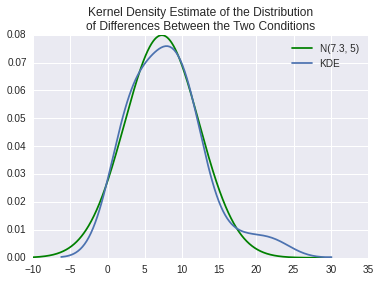

In [60]:
plt.plot(x,norm.pdf(x, 7.3, 5), 'g-', label="N(7.3, 5)")
sns.kdeplot(df['Incongruent']-df['Congruent'], label="KDE")
plt.title('Kernel Density Estimate of the Distribution\nof Differences Between the Two Conditions');
x = np.linspace(-10, 30, 1000)
plt.legend();

At a glance, the difference distribution looks roughly normally-distributed (a manually fitted normal distribution is plotted for comparison), justifying the use of a paired t-test.

## Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [62]:
ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The analysis resulted in a t statistic of -8.021, with a p-value of 4.103e-8 <<< 0.001.

We confidently reject the null hypothesis (that the means for the two conditions is the same). The *p-value* indicates roughly that we have only 4 in 100,000,000 chances of seeing a difference at least this extreme if the null hypothesis is true, which is roughly equal to the chance that you will die from being bitten or stung by an insect in the next year. [2]

The result matches our expectations, outlined in the hypothesis section.

## Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

## References

- [1] Analysis checklist: Paired t test. GraphPad Software. Available at: http://www.graphpad.com/guides/prism/6/statistics/index.htm?stat_checklist_pairedt.htm. Accessed August 25 2015.
- [2] The odds of serious risks that people can relate to. The Risk Communication Institute. Available at: http://www.riskcomm.com/visualaids/riskscale/datasources.php. Accessed August 25 2015.